#### Import Libraries :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Import Dataset :

In [2]:
cr = pd.read_csv(r"C:\Users\Pallavi Pawara\Documents\CreditRisk.csv")

#### View Top 5 Rows :

In [3]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### View Bottom 5 Rows :

In [4]:
cr.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


#### Check for Null Values :

In [5]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

#### Remove Null Values :

In [7]:
cr.Gender        = cr.Gender.fillna('Male')
cr.Self_Employed = cr.Self_Employed.fillna('Yes')
cr.Credit_History =  cr.Credit_History.fillna(1)
cr.Dependents  = cr.Dependents.fillna(0)
cr.LoanAmount  = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term  = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Married            = cr.Married.fillna("No")


#### Convert Data into Number Form :

In [8]:
cr.Gender.replace({"Male" :1 , "Female":0} ,inplace = True)
cr.Married.replace({"No" :0 , "Yes":1} , inplace = True)
cr.Education.replace({"Graduate" :1  , "Not Graduate":0} , inplace = True)
cr.Self_Employed.replace({"No":0 , "Yes" :1 }, inplace = True)
cr.Property_Area.replace({"Semiurban" :1 ,"Urban": 2 , "Rural" :3} , inplace = True)
cr.Loan_Status.replace({"Y" :1 , "N" : 0}, inplace = True)



In [9]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


#### Again Check for Null values :

In [10]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Drop " Loan_ID " Column :

In [11]:
cr = cr.drop(['Loan_ID']  , axis =1 )

In [12]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3,0
2,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


#### Sampling :

#### Split data into Training  & Test set : 

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
cr_train , cr_test = train_test_split(cr , test_size = .2 , random_state  = 0)

In [16]:
cr_train_x = cr_train.iloc[: , 0:-1]
cr_train_y = cr_train.iloc[: , -1]

In [17]:
cr_test_x = cr_test.iloc[: , 0:-1]
cr_test_y = cr_test.iloc[: , -1]

In [18]:
print(cr_train_x.shape)
print(cr_train_y.shape)

(784, 11)
(784,)


In [21]:
print(cr_test_x.shape)
print(cr_test_x.shape)

(197, 11)
(197, 11)


### Build Logistic Regression Model :

In [20]:
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()


#### Fit the Model on Training Dataset :

In [22]:
logreg.fit(cr_train_x , cr_train_y)

LogisticRegression()

#### Prediction on Test Dataset :

In [23]:
pred_value  = logreg.predict(cr_test_x )
pred_value

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

#### Confusion Matrix :

In [29]:
from sklearn.metrics import confusion_matrix
table1 =  confusion_matrix(cr_test_y, pred_value )
table1

array([[ 23,  26],
       [  4, 144]], dtype=int64)

#### Accuracy :

In [30]:
table1.diagonal().sum() * 100  / table1.sum()


84.77157360406092

#### Classification Report :

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(cr_test_y, pred_value))

              precision    recall  f1-score   support

           0       0.85      0.47      0.61        49
           1       0.85      0.97      0.91       148

    accuracy                           0.85       197
   macro avg       0.85      0.72      0.76       197
weighted avg       0.85      0.85      0.83       197



#### Or :

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_value , cr_test_y) * 100 

84.77157360406092

#### To Find Tpr :

In [34]:
Tpr  = table1[1][1] / (table1[1][1]  + table1[0][1] )
Tpr

0.8470588235294118

#### To Find Fpr :

In [35]:
Fpr  = table1[1][0] / (table1[1][0]  + table1[0][0] )
Fpr

0.14814814814814814

#### To Find Coefficient :

In [36]:
logreg.coef_

array([[ 3.73735506e-01,  7.34908690e-01,  1.31150334e-02,
         6.70031153e-01, -5.56980521e-02,  7.06312252e-05,
        -5.13490028e-05, -6.09489924e-03, -5.42329552e-03,
         3.71441503e+00, -5.43188974e-01]])

#### To Find Intercept :

In [37]:
logreg.intercept_

array([0.33006274])

#### Prediction Probability :

In [38]:
pred_prob   = logreg.predict_proba(cr_test_x )
pred_prob

array([[0.33243125, 0.66756875],
       [0.17074755, 0.82925245],
       [0.15248615, 0.84751385],
       [0.06524958, 0.93475042],
       [0.7145636 , 0.2854364 ],
       [0.93343285, 0.06656715],
       [0.05856353, 0.94143647],
       [0.37991443, 0.62008557],
       [0.06890854, 0.93109146],
       [0.90441432, 0.09558568],
       [0.18591572, 0.81408428],
       [0.07359011, 0.92640989],
       [0.13470816, 0.86529184],
       [0.2880962 , 0.7119038 ],
       [0.12344328, 0.87655672],
       [0.01721547, 0.98278453],
       [0.05245356, 0.94754644],
       [0.07960041, 0.92039959],
       [0.84970646, 0.15029354],
       [0.12059355, 0.87940645],
       [0.10249684, 0.89750316],
       [0.5377847 , 0.4622153 ],
       [0.04103123, 0.95896877],
       [0.13737365, 0.86262635],
       [0.13917649, 0.86082351],
       [0.22051188, 0.77948812],
       [0.0128244 , 0.9871756 ],
       [0.1208635 , 0.8791365 ],
       [0.11776002, 0.88223998],
       [0.11211566, 0.88788434],
       [0.

#### AUROC Curve :

In [39]:
pred_prob = logreg.predict_proba(cr_test_x )

In [40]:
pred_prob

array([[0.33243125, 0.66756875],
       [0.17074755, 0.82925245],
       [0.15248615, 0.84751385],
       [0.06524958, 0.93475042],
       [0.7145636 , 0.2854364 ],
       [0.93343285, 0.06656715],
       [0.05856353, 0.94143647],
       [0.37991443, 0.62008557],
       [0.06890854, 0.93109146],
       [0.90441432, 0.09558568],
       [0.18591572, 0.81408428],
       [0.07359011, 0.92640989],
       [0.13470816, 0.86529184],
       [0.2880962 , 0.7119038 ],
       [0.12344328, 0.87655672],
       [0.01721547, 0.98278453],
       [0.05245356, 0.94754644],
       [0.07960041, 0.92039959],
       [0.84970646, 0.15029354],
       [0.12059355, 0.87940645],
       [0.10249684, 0.89750316],
       [0.5377847 , 0.4622153 ],
       [0.04103123, 0.95896877],
       [0.13737365, 0.86262635],
       [0.13917649, 0.86082351],
       [0.22051188, 0.77948812],
       [0.0128244 , 0.9871756 ],
       [0.1208635 , 0.8791365 ],
       [0.11776002, 0.88223998],
       [0.11211566, 0.88788434],
       [0.

In [41]:
from sklearn.metrics  import  roc_auc_score
from sklearn.metrics import roc_curve


In [42]:
pred_value_prob = pd.DataFrame(pred_prob)

In [43]:
pred_value_prob

,0,1
0,0.332431,0.667569
1,0.170748,0.829252
2,0.152486,0.847514
3,0.065250,0.934750
4,0.714564,0.285436
...,...,...
192,0.809555,0.190445
193,0.094468,0.905532
194,0.280643,0.719357
195,0.214165,0.785835


In [44]:
pred_value_prob = pred_value_prob.iloc[:, 1]

In [45]:
pred_value_prob

0      0.667569
1      0.829252
2      0.847514
3      0.934750
4      0.285436
         ...   
192    0.190445
193    0.905532
194    0.719357
195    0.785835
196    0.790733
Name: 1, Length: 197, dtype: float64

In [46]:
fpr , tpr  , threshold = roc_curve(cr_test_y,  pred_value_prob)


In [48]:
import seaborn as sns

No handles with labels found to put in legend.


Text(0.5, 1.0, 'AUROC CURVE')

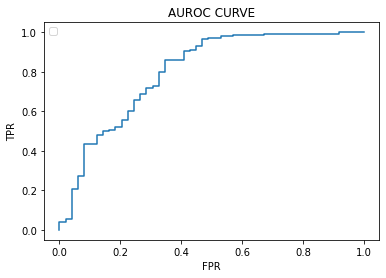

In [50]:
plt.plot(fpr, tpr  )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = "upper left")
plt.title("AUROC CURVE")


Text(0, 0.5, 'TPR')

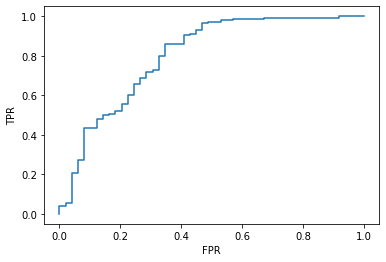

In [51]:
plt.plot(fpr, tpr  )
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0.5, 0.5, 'AUROC VALUE IS .85')

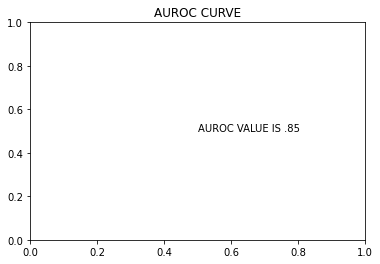

In [53]:
plt.title("AUROC CURVE")
plt.text(x = .5 , y =.5 , s = "AUROC VALUE IS .85")



#### Build Decision Tree Model :

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(cr_train_x , cr_train_y)

DecisionTreeClassifier()

#### Prediction on Test Data :

In [55]:
pred_dt  = dt.predict(cr_test_x )
pred_dt

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1],
      dtype=int64)

#### Confusion Matrix :

In [56]:
from sklearn.metrics import confusion_matrix
tab_dt =  confusion_matrix(cr_test_y, pred_dt )
tab_dt

array([[ 31,  18],
       [ 22, 126]], dtype=int64)

#### Accuracy :

In [92]:
tab_dt.diagonal().sum() * 100  / tab_dt.sum()


78.1725888324873

#### Classification Report :

In [57]:
from sklearn.metrics import classification_report
print(classification_report(cr_test_y, pred_dt))

              precision    recall  f1-score   support

           0       0.58      0.63      0.61        49
           1       0.88      0.85      0.86       148

    accuracy                           0.80       197
   macro avg       0.73      0.74      0.74       197
weighted avg       0.80      0.80      0.80       197



#### Feature Importance :

In [58]:
dt.feature_importances_

array([0.02145283, 0.02645839, 0.02255271, 0.02824843, 0.00801703,
       0.23283583, 0.07841444, 0.12907704, 0.02679287, 0.41006307,
       0.01608737])

In [59]:
dt.feature_importances_.sum()

0.9999999999999999

In [60]:
len(dt.feature_importances_)

11

In [61]:
cr_train_x.shape

(784, 11)

In [62]:
feature_importance =  pd.DataFrame({"Feature_Names" : cr_train_x.columns  , "Importance" :dt.feature_importances_})
feature_importance

,Feature_Names,Importance
0,Gender,0.021453
1,Married,0.026458
2,Dependents,0.022553
3,Education,0.028248
4,Self_Employed,0.008017
5,ApplicantIncome,0.232836
6,CoapplicantIncome,0.078414
7,LoanAmount,0.129077
8,Loan_Amount_Term,0.026793
9,Credit_History,0.410063


In [63]:
feature_importance.sort_values("Importance"  , ascending= False)


,Feature_Names,Importance
9,Credit_History,0.410063
5,ApplicantIncome,0.232836
7,LoanAmount,0.129077
6,CoapplicantIncome,0.078414
3,Education,0.028248
8,Loan_Amount_Term,0.026793
1,Married,0.026458
2,Dependents,0.022553
0,Gender,0.021453
10,Property_Area,0.016087


#### Build Random Forest Model :

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier()


In [65]:
rfc  = RandomForestClassifier(n_estimators  = 100)
rfc.fit(cr_train_x , cr_train_y)


RandomForestClassifier()

#### Prediction on Test Data:

In [66]:
pred_rfc  = rfc.predict(cr_test_x )
pred_rfc

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

#### Confusion Matrix :

In [68]:
tab1_dt  = confusion_matrix(cr_test_y , pred_rfc)
tab1_dt

array([[ 27,  22],
       [  3, 145]], dtype=int64)

#### Accuracy :

In [69]:
from sklearn.metrics import classification_report, accuracy_score

In [70]:
accuracy_score(cr_test_y , pred_rfc)

0.8730964467005076

#### Classification Report :

In [71]:
print(classification_report(cr_test_y , pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.55      0.68        49
           1       0.87      0.98      0.92       148

    accuracy                           0.87       197
   macro avg       0.88      0.77      0.80       197
weighted avg       0.88      0.87      0.86       197



#### Feature Importance :

In [72]:
feature_importance_rfc =  pd.DataFrame({"Feature_Names" : cr_train_x.columns  , "Importance" :rfc.feature_importances_})


In [73]:
feature_importance_rfc.sort_values("Importance"  , ascending= False)


,Feature_Names,Importance
9,Credit_History,0.366145
5,ApplicantIncome,0.188611
7,LoanAmount,0.161344
6,CoapplicantIncome,0.091554
10,Property_Area,0.041135
8,Loan_Amount_Term,0.037715
2,Dependents,0.037374
4,Self_Employed,0.020655
3,Education,0.020034
1,Married,0.019690


#### Build ADA BOOST Model :

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [75]:
dt = DecisionTreeClassifier()


In [76]:
abc = AdaBoostClassifier( dt   ,  10)


In [77]:
abc.fit(cr_train_x , cr_train_y)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)

#### Prediction on Test Data :

In [78]:
pred_abc = abc.predict(cr_test_x)
pred_abc

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1],
      dtype=int64)

#### Confusion Matrix :

In [79]:
tab_abc = confusion_matrix(pred_abc , cr_test_y)
tab_abc

array([[ 33,  22],
       [ 16, 126]], dtype=int64)

#### Accuracy :

In [81]:
from sklearn.metrics import classification_report, accuracy_score

In [82]:
accuracy_score(pred_abc , cr_test_y)

0.8071065989847716

#### Classification Report :

In [83]:
print(classification_report(pred_abc , cr_test_y))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        55
           1       0.85      0.89      0.87       142

    accuracy                           0.81       197
   macro avg       0.76      0.74      0.75       197
weighted avg       0.80      0.81      0.80       197



#### Build KNN Model :

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors= 7)

In [86]:
knn.fit(cr_train_x,cr_train_y)

KNeighborsClassifier(n_neighbors=7)

#### Prediction on Test Data :

In [90]:
knn_pred = knn.predict(cr_test_x)

In [91]:
knn_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

#### Confusion Matrix :

In [103]:
tab_knn = confusion_matrix(cr_test_y, knn_pred)
tab_knn

array([[ 12,  37],
       [ 15, 133]], dtype=int64)

#### Accuracy :

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_test_y, knn_pred) * 100 

73.60406091370558

#### Classification Report :

In [105]:
print(classification_report(cr_test_y, knn_pred))

              precision    recall  f1-score   support

           0       0.44      0.24      0.32        49
           1       0.78      0.90      0.84       148

    accuracy                           0.74       197
   macro avg       0.61      0.57      0.58       197
weighted avg       0.70      0.74      0.71       197



In [106]:
lst = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(cr_train_x , cr_train_y)
    pred_knn = knn.predict(cr_test_x)
    tab_knn = confusion_matrix(pred_knn, cr_test_y)
    acc = tab_knn.diagonal().sum() / tab_knn.sum()
    lst.append(acc)

#### Plot Graph :

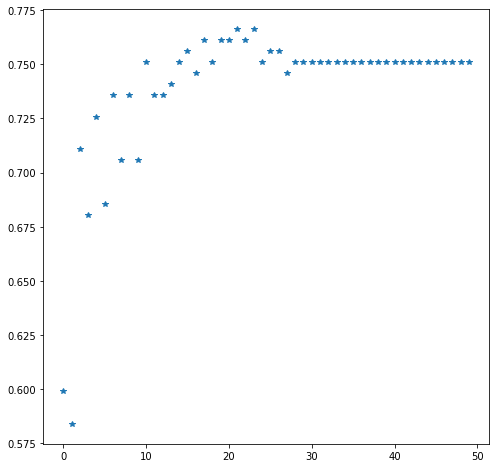

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8 , 8))
plt.plot(lst , "*")

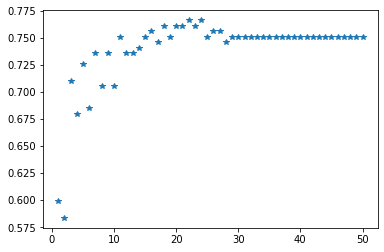

In [108]:
num = list(range(1,51))
plt.plot(num ,lst , "*")

#### Build Cross Validation Model :

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
scores = cross_val_score(dt, cr_train_x , cr_train_y , cv = 10)

In [111]:
scores

array([0.64556962, 0.81012658, 0.81012658, 0.81012658, 0.66666667,
       0.74358974, 0.78205128, 0.79487179, 0.82051282, 0.79487179])

In [112]:
scores.mean()

0.767851346965271

In [113]:
scores.max()

0.8205128205128205

####  Build GRID SEARCH Model :

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
search_dict = {"criterion" :["gini" , "entropy"],
"max_depth" : range(3,10),
"min_samples_split" :range(25,50) }



In [116]:
grid = GridSearchCV( dt , param_grid = search_dict )

#### Fit the model on Training Data :

In [121]:
grid.fit(cr_train_x , cr_train_y)



GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'min_samples_split': range(25, 50)})

In [122]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 25}

#### Accuracy :

In [123]:
grid.best_score_

0.8494610485056345

#### ................................................ Thank You .......................................................................